In [33]:
# Import pacakdge 
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('merge_data_ml.csv')

In [52]:
df.shape

(1288380, 37)

In [8]:
## get each country top 10 sales 
df['cost']=df['quantity']*df['unit_cogs']
df['profit']=df['sales']-df['cost']

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2588/1146093094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_2588/1146093094.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df.corr(), annot=True, mask=mask)


<function matplotlib.pyplot.show(close=None, block=None)>

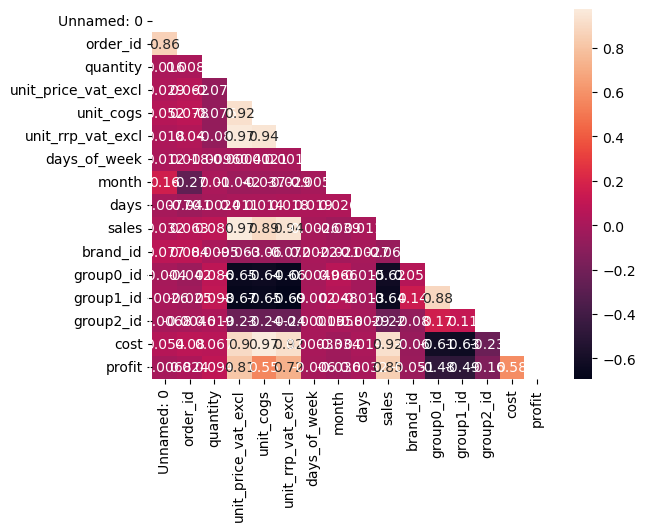

In [9]:
mask = np.triu(np.ones_like(df.corr()))
dataplot = sb.heatmap(df.corr(), annot=True, mask=mask)

mp.show

In [14]:
df_p =df
df_p.country.value_counts()

Czech Republic    393774
Slovakia          207500
Romania           169970
Hungary           144306
Spain              94337
Germany            94043
France             55167
Italy              29734
com                24203
Croatia            18978
Ireland            12724
Denmark            10641
Austria             8809
Netherlands         8357
Sweden              6181
Portugal            3343
Belgium             2561
Poland              2091
Finland             1246
Slovenia             402
United Kingdom        10
Bulgaria               3
Name: country, dtype: int64

In [51]:
df_p.category.value_counts()

football     683974
running      358849
fitness      185077
lifestyle     60480
Name: category, dtype: int64

In [21]:
df_product = df_p.pivot_table(index='date', columns='category', aggfunc={'sales':sum})
df_product

sales                                         
category         fitness      football    lifestyle       running
date                                                             
2019-06-01    176.118467   3001.739345   237.904944    544.734163
2019-06-02           NaN     16.670977    40.841860           NaN
2019-06-03     92.382558    722.812693    41.697457    508.086821
2019-06-04  10779.162288  25543.831709  4446.016516  26482.896975
2019-06-05   3858.107738  44483.017968  2875.396700  12817.213368
...                  ...           ...          ...           ...
2022-01-10  10559.299441  50139.146167  1217.072474  38453.890010
2022-01-11   9726.153536  50783.317583  1051.440286  41297.427228
2022-01-12   8865.044568  41452.500481  1104.851878  41015.962408
2022-01-13   8096.798980  43738.830676  1213.805448  34242.995132
2022-01-14    240.248837   1256.084078     9.770155   1537.894717

[958 rows x 4 columns]

In [30]:
df_product_na = df_product.fillna(0)
df_product_na

sales                                         
category         fitness      football    lifestyle       running
date                                                             
2019-06-01    176.118467   3001.739345   237.904944    544.734163
2019-06-02      0.000000     16.670977    40.841860      0.000000
2019-06-03     92.382558    722.812693    41.697457    508.086821
2019-06-04  10779.162288  25543.831709  4446.016516  26482.896975
2019-06-05   3858.107738  44483.017968  2875.396700  12817.213368
...                  ...           ...          ...           ...
2022-01-10  10559.299441  50139.146167  1217.072474  38453.890010
2022-01-11   9726.153536  50783.317583  1051.440286  41297.427228
2022-01-12   8865.044568  41452.500481  1104.851878  41015.962408
2022-01-13   8096.798980  43738.830676  1213.805448  34242.995132
2022-01-14    240.248837   1256.084078     9.770155   1537.894717

[958 rows x 4 columns]

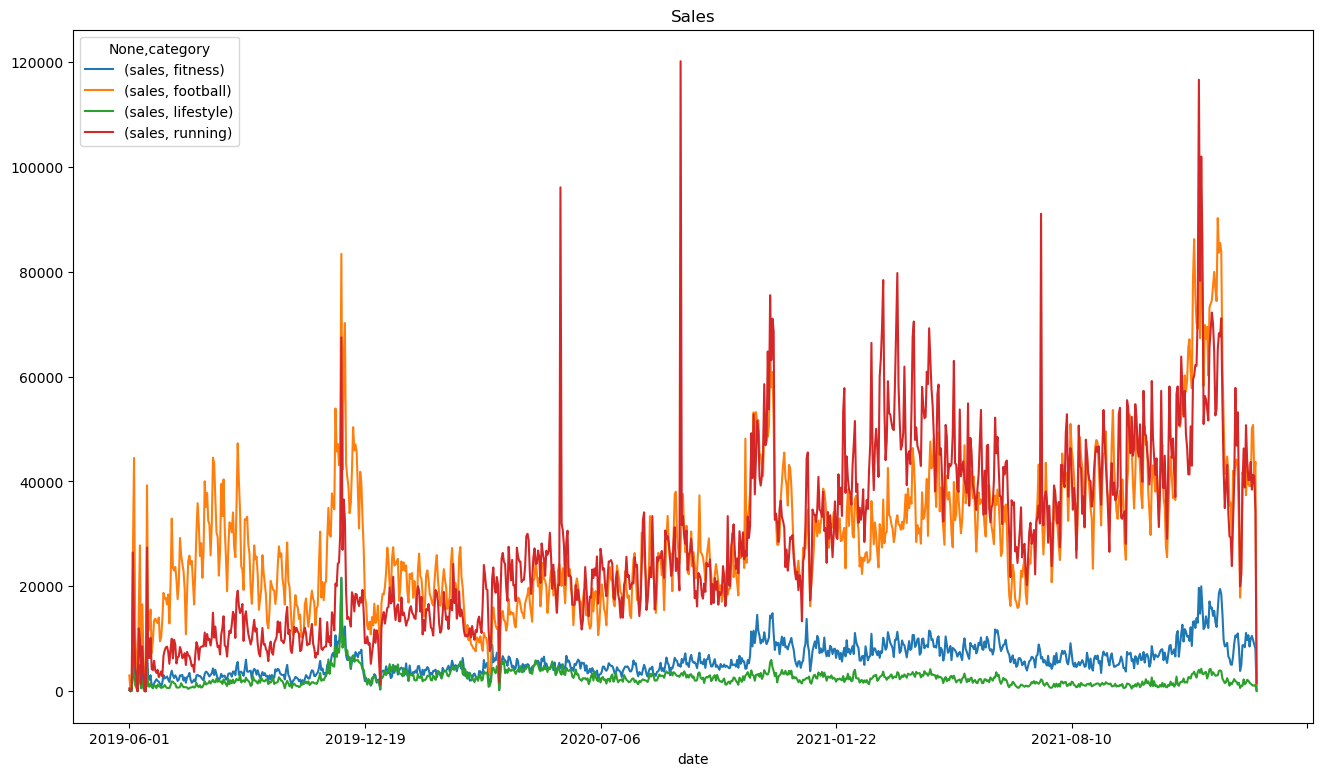

In [34]:
###Graphs
df_product_na.plot(figsize=(16, 9), title='Sales')
plt.ticklabel_format(style='plain', axis='y')

In [35]:
df_country = df_p.pivot_table(index='date', columns='country', aggfunc={'sales':sum})
df_country

sales                                                      \
country         Austria     Belgium    Bulgaria      Croatia Czech Republic   
date                                                                          
2019-06-01          NaN         NaN         NaN          NaN    2195.044958   
2019-06-02          NaN         NaN         NaN          NaN      40.841860   
2019-06-03          NaN         NaN         NaN          NaN    1091.549999   
2019-06-04          NaN         NaN         NaN          NaN   22382.004622   
2019-06-05          NaN         NaN         NaN          NaN   34289.521266   
...                 ...         ...         ...          ...            ...   
2022-01-10   805.676914  662.077704         NaN  2126.850385   20106.302688   
2022-01-11  1126.546138  638.194232   96.558139  2583.208804   20872.636407   
2022-01-12  1526.391731  459.636032   94.749841  2399.124086   18753.802689   
2022-01-13   842.707697  206.595093  143.976163  2177.245691   19721.378657   
2022-01-14          NaN   18.724225         NaN    57.759553     342.687208   

                                                                             \
country         Denmark     Finland       France      Germany       Hungary   
date                                                                          
2019-06-01          NaN         NaN          NaN   112.674194    204.089463   
2019-06-02          NaN         NaN          NaN          NaN           NaN   
2019-06-03          NaN         NaN          NaN          NaN           NaN   
2019-06-04          NaN         NaN          NaN  8782.810701  18557.715584   
2019-06-05          NaN         NaN          NaN  1282.799506  14155.930644   
...                 ...         ...          ...          ...           ...   
2022-01-10  1569.536246  536.808496  4530.020303  8604.632470   7698.852847   
2022-01-11  1249.272867  610.142465  4883.726786  7569.312923   5897.794651   
2022-01-12  1438.146231   93.789560  9655.233490  5873.501403   4730.833711   
2022-01-13  1269.548836  293.806674  5542.118995  6611.137623   5830.166278   
2022-01-14   296.696341         NaN   473.689705   277.004759    113.105059   

            ...                                                       \
country     ...  Netherlands       Poland     Portugal       Romania   
date        ...                                                        
2019-06-01  ...          NaN          NaN          NaN    325.608781   
2019-06-02  ...          NaN          NaN          NaN           NaN   
2019-06-03  ...          NaN          NaN          NaN     50.692863   
2019-06-04  ...          NaN          NaN          NaN   9679.759727   
2019-06-05  ...          NaN          NaN          NaN  11558.073754   
...         ...          ...          ...          ...           ...   
2022-01-10  ...  2090.349409  1198.899221  1532.454309  13011.322487   
2022-01-11  ...  1694.606231  1331.995855  1858.233673  13873.168244   
2022-01-12  ...  2839.360403   988.273097  2876.143769   8720.860305   
2022-01-13  ...  1899.270231   860.168173  1526.922022  14936.441315   
2022-01-14  ...   120.821023          NaN          NaN    112.630535   

                                                                 \
country         Slovakia    Slovenia         Spain       Sweden   
date                                                              
2019-06-01    539.775431         NaN    529.848893          NaN   
2019-06-02           NaN         NaN           NaN          NaN   
2019-06-03    181.039211         NaN           NaN          NaN   
2019-06-04           NaN         NaN   7849.616855          NaN   
2019-06-05           NaN         NaN   2747.410603          NaN   
...                  ...         ...           ...          ...   
2022-01-10  10281.557491  772.019813  15876.887086  1510.988650   
2022-01-11  12710.226545  426.904278  15221.903055  1440.757208   
2022-01-12  11583.460157  366.414263  12816.852964  1230.4

In [36]:
df_country_na = df_country.fillna(0)
df_country_na

sales                                                      \
country         Austria     Belgium    Bulgaria      Croatia Czech Republic   
date                                                                          
2019-06-01     0.000000    0.000000    0.000000     0.000000    2195.044958   
2019-06-02     0.000000    0.000000    0.000000     0.000000      40.841860   
2019-06-03     0.000000    0.000000    0.000000     0.000000    1091.549999   
2019-06-04     0.000000    0.000000    0.000000     0.000000   22382.004622   
2019-06-05     0.000000    0.000000    0.000000     0.000000   34289.521266   
...                 ...         ...         ...          ...            ...   
2022-01-10   805.676914  662.077704    0.000000  2126.850385   20106.302688   
2022-01-11  1126.546138  638.194232   96.558139  2583.208804   20872.636407   
2022-01-12  1526.391731  459.636032   94.749841  2399.124086   18753.802689   
2022-01-13   842.707697  206.595093  143.976163  2177.245691   19721.378657   
2022-01-14     0.000000   18.724225    0.000000    57.759553     342.687208   

                                                                             \
country         Denmark     Finland       France      Germany       Hungary   
date                                                                          
2019-06-01     0.000000    0.000000     0.000000   112.674194    204.089463   
2019-06-02     0.000000    0.000000     0.000000     0.000000      0.000000   
2019-06-03     0.000000    0.000000     0.000000     0.000000      0.000000   
2019-06-04     0.000000    0.000000     0.000000  8782.810701  18557.715584   
2019-06-05     0.000000    0.000000     0.000000  1282.799506  14155.930644   
...                 ...         ...          ...          ...           ...   
2022-01-10  1569.536246  536.808496  4530.020303  8604.632470   7698.852847   
2022-01-11  1249.272867  610.142465  4883.726786  7569.312923   5897.794651   
2022-01-12  1438.146231   93.789560  9655.233490  5873.501403   4730.833711   
2022-01-13  1269.548836  293.806674  5542.118995  6611.137623   5830.166278   
2022-01-14   296.696341    0.000000   473.689705   277.004759    113.105059   

            ...                                                       \
country     ...  Netherlands       Poland     Portugal       Romania   
date        ...                                                        
2019-06-01  ...     0.000000     0.000000     0.000000    325.608781   
2019-06-02  ...     0.000000     0.000000     0.000000      0.000000   
2019-06-03  ...     0.000000     0.000000     0.000000     50.692863   
2019-06-04  ...     0.000000     0.000000     0.000000   9679.759727   
2019-06-05  ...     0.000000     0.000000     0.000000  11558.073754   
...         ...          ...          ...          ...           ...   
2022-01-10  ...  2090.349409  1198.899221  1532.454309  13011.322487   
2022-01-11  ...  1694.606231  1331.995855  1858.233673  13873.168244   
2022-01-12  ...  2839.360403   988.273097  2876.143769   8720.860305   
2022-01-13  ...  1899.270231   860.168173  1526.922022  14936.441315   
2022-01-14  ...   120.821023     0.000000     0.000000    112.630535   

                                                                 \
country         Slovakia    Slovenia         Spain       Sweden   
date                                                              
2019-06-01    539.775431    0.000000    529.848893     0.000000   
2019-06-02      0.000000    0.000000      0.000000     0.000000   
2019-06-03    181.039211    0.000000      0.000000     0.000000   
2019-06-04      0.000000    0.000000   7849.616855     0.000000   
2019-06-05      0.000000    0.000000   2747.410603     0.000000   
...                  ...         ...           ...          ...   
2022-01-10  10281.557491  772.019813  15876.887086  1510.988650   
2022-01-11  12710.226545  426.904278  15221.903055  1440.757208   
2022-01-12  11583.460157  366.414263  12816.852964  1230.4

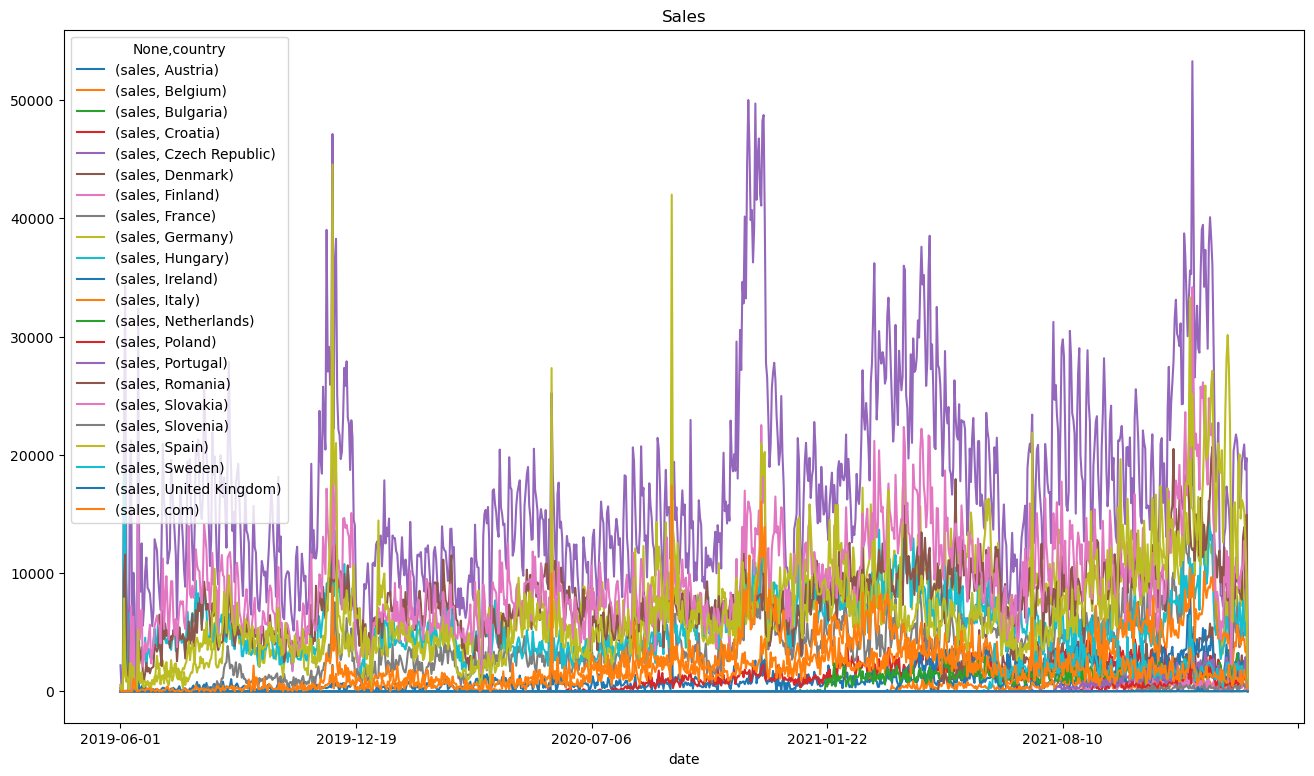

In [37]:
###Graphs
df_country_na.plot(figsize=(16, 9), title='Sales')
plt.ticklabel_format(style='plain', axis='y')

In [42]:
grouped_multiple = df_p.groupby(['date', 'country', 'category']).agg({'sales':sum})
grouped_multiple

sales
date       country        category              
2019-06-01 Czech Republic fitness     111.281783
                          football   1636.585269
                          lifestyle   121.148062
                          running     326.029845
           Germany        fitness       6.554316
...                                          ...
2022-01-14 Slovakia       running     123.238581
           Spain          football    100.978085
                          running     114.156147
           Sweden         running      11.482015
           com            running     180.511008

[41695 rows x 1 columns]

In [47]:
df_final_v = grouped_multiple.pivot_table(index='date', columns=['country','category'], aggfunc={'sales':sum})

In [48]:
df_final_v

sales                                                 \
country        Austria                                        Belgium   
category       fitness    football lifestyle      running     fitness   
date                                                                    
2019-06-01         NaN         NaN       NaN          NaN         NaN   
2019-06-02         NaN         NaN       NaN          NaN         NaN   
2019-06-03         NaN         NaN       NaN          NaN         NaN   
2019-06-04         NaN         NaN       NaN          NaN         NaN   
2019-06-05         NaN         NaN       NaN          NaN         NaN   
...                ...         ...       ...          ...         ...   
2022-01-10   19.343597  142.244589       NaN   644.088728  132.231767   
2022-01-11  200.648976  244.213721       NaN   681.683441         NaN   
2022-01-12   14.270473  133.998604       NaN  1378.122654   71.087395   
2022-01-13         NaN         NaN       NaN   842.707697   20.577163   
2022-01-14         NaN         NaN       NaN          NaN         NaN   

                                                                      ...  \
country                                         Bulgaria              ...   
category      football  lifestyle     running    fitness    football  ...   
date                                                                  ...   
2019-06-01         NaN        NaN         NaN        NaN         NaN  ...   
2019-06-02         NaN        NaN         NaN        NaN         NaN  ...   
2019-06-03         NaN        NaN         NaN        NaN         NaN  ...   
2019-06-04         NaN        NaN         NaN        NaN         NaN  ...   
2019-06-05         NaN        NaN         NaN        NaN         NaN  ...   
...                ...        ...         ...        ...         ...  ...   
2022-01-10   91.896294        NaN  437.949643        NaN         NaN  ...   
2022-01-11  251.738884        NaN  386.455348  96.558139         NaN  ...   
2022-01-12         NaN        NaN  388.548637  94.749841         NaN  ...   
2022-01-13   12.825233  74.310628   98.882070        NaN  143.976163  ...   
2022-01-14   18.724225        NaN         NaN        NaN         NaN  ...   

                                                                          \
country         Sweden                                    United Kingdom   
category       fitness    football lifestyle      running        fitness   
date                                                                       
2019-06-01         NaN         NaN       NaN          NaN            NaN   
2019-06-02         NaN         NaN       NaN          NaN            NaN   
2019-06-03         NaN         NaN       NaN          NaN            NaN   
2019-06-04         NaN         NaN       NaN          NaN            NaN   
2019-06-05         NaN         NaN       NaN          NaN            NaN   
...                ...         ...       ...          ...            ...   
2022-01-10  182.270511   80.599814       NaN  1248.118325            NaN   
2022-01-11   26.535442  236.180093       NaN  1178.041674            NaN   
2022-01-12   28.721829  345.396525       NaN   856.292495            NaN   
2022-01-13  123.885829  121.892434       NaN   677.606759            NaN   
2022-01-14         NaN         NaN       NaN    11.482015            NaN   

                                                                   
country                   com                                      
category   running    fitness    football  lifestyle      running  
date                                                               
2019-06-01     NaN        NaN         NaN  53.455199          NaN  
2019-06-02     NaN        NaN   16.670977        NaN          NaN  
2019-06-03     NaN        NaN         NaN  41.697457          NaN  
2019-06-04     NaN        NaN         NaN        NaN          NaN  
2019-06-05     NaN        NaN         NaN        NaN          NaN  
...         

In [49]:
df_final_vf = df_final_v.fillna(0)
df_final_vf

sales                                                 \
country        Austria                                        Belgium   
category       fitness    football lifestyle      running     fitness   
date                                                                    
2019-06-01    0.000000    0.000000       0.0     0.000000    0.000000   
2019-06-02    0.000000    0.000000       0.0     0.000000    0.000000   
2019-06-03    0.000000    0.000000       0.0     0.000000    0.000000   
2019-06-04    0.000000    0.000000       0.0     0.000000    0.000000   
2019-06-05    0.000000    0.000000       0.0     0.000000    0.000000   
...                ...         ...       ...          ...         ...   
2022-01-10   19.343597  142.244589       0.0   644.088728  132.231767   
2022-01-11  200.648976  244.213721       0.0   681.683441    0.000000   
2022-01-12   14.270473  133.998604       0.0  1378.122654   71.087395   
2022-01-13    0.000000    0.000000       0.0   842.707697   20.577163   
2022-01-14    0.000000    0.000000       0.0     0.000000    0.000000   

                                                                      ...  \
country                                         Bulgaria              ...   
category      football  lifestyle     running    fitness    football  ...   
date                                                                  ...   
2019-06-01    0.000000   0.000000    0.000000   0.000000    0.000000  ...   
2019-06-02    0.000000   0.000000    0.000000   0.000000    0.000000  ...   
2019-06-03    0.000000   0.000000    0.000000   0.000000    0.000000  ...   
2019-06-04    0.000000   0.000000    0.000000   0.000000    0.000000  ...   
2019-06-05    0.000000   0.000000    0.000000   0.000000    0.000000  ...   
...                ...        ...         ...        ...         ...  ...   
2022-01-10   91.896294   0.000000  437.949643   0.000000    0.000000  ...   
2022-01-11  251.738884   0.000000  386.455348  96.558139    0.000000  ...   
2022-01-12    0.000000   0.000000  388.548637  94.749841    0.000000  ...   
2022-01-13   12.825233  74.310628   98.882070   0.000000  143.976163  ...   
2022-01-14   18.724225   0.000000    0.000000   0.000000    0.000000  ...   

                                                                          \
country         Sweden                                    United Kingdom   
category       fitness    football lifestyle      running        fitness   
date                                                                       
2019-06-01    0.000000    0.000000       0.0     0.000000            0.0   
2019-06-02    0.000000    0.000000       0.0     0.000000            0.0   
2019-06-03    0.000000    0.000000       0.0     0.000000            0.0   
2019-06-04    0.000000    0.000000       0.0     0.000000            0.0   
2019-06-05    0.000000    0.000000       0.0     0.000000            0.0   
...                ...         ...       ...          ...            ...   
2022-01-10  182.270511   80.599814       0.0  1248.118325            0.0   
2022-01-11   26.535442  236.180093       0.0  1178.041674            0.0   
2022-01-12   28.721829  345.396525       0.0   856.292495            0.0   
2022-01-13  123.885829  121.892434       0.0   677.606759            0.0   
2022-01-14    0.000000    0.000000       0.0    11.482015            0.0   

                                                                   
country                   com                                      
category   running    fitness    football  lifestyle      running  
date                                                               
2019-06-01     0.0   0.000000    0.000000  53.455199     0.000000  
2019-06-02     0.0   0.000000   16.670977   0.000000     0.000000  
2019-06-03     0.0   0.000000    0.000000  41.697457     0.000000  
2019-06-04     0.0   0.000000    0.000000   0.000000     0.000000  
2019-06-05     0.0   0.000000    0.000000   0.000000     0.000000  
...         

In [50]:
df_final_vf.to_csv('merge_data_coun_prod.csv')